In [30]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

NB_MINIMUM_LABEL = 200

CSV_PATH =  Path("/home/bioeos/Documents/project_hub/madagascar-aina/csv/3_aina_thumbnails.csv")
CSV_PATH_Toliara =  Path("/home/bioeos/Documents/project_hub/madagascar-aina/csv/6_aina_thumbnails_Toliara.csv")
CSV_PATH_Salary =  Path("/home/bioeos/Documents/project_hub/madagascar-aina/csv/5_aina_thumbnails_Salary.csv")
CSV_PATH_both =  Path("/home/bioeos/Documents/project_hub/madagascar-aina/csv/4_aina_thumbnails_both.csv")
OUTPUT_FOLDER = Path("/home/bioeos/Documents/project_hub/madagascar-aina/csv/BOTH/")

In [26]:
# Merge UNKNOW and ""

df = pd.read_csv(CSV_PATH)

df['UNK'] = df['Unnamed: 1'] + df['UNK']

# Drop the old 'S' and 'SG' columns
df = df.drop(columns=['Unnamed: 1'])

In [27]:
# Get only Soliara and Toliara

df_Toliara = df[df["FileName"].str.contains("Toliara")]
df_Salary = df[df["FileName"].str.contains("Salary")]

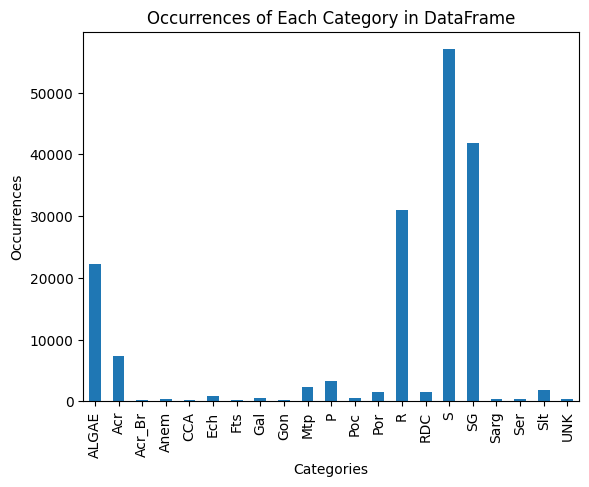

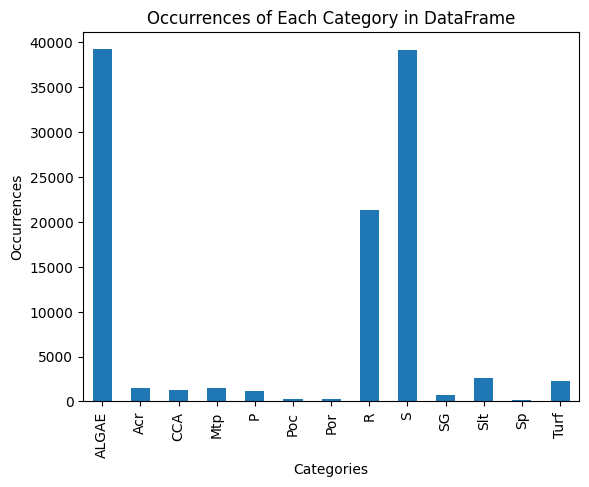

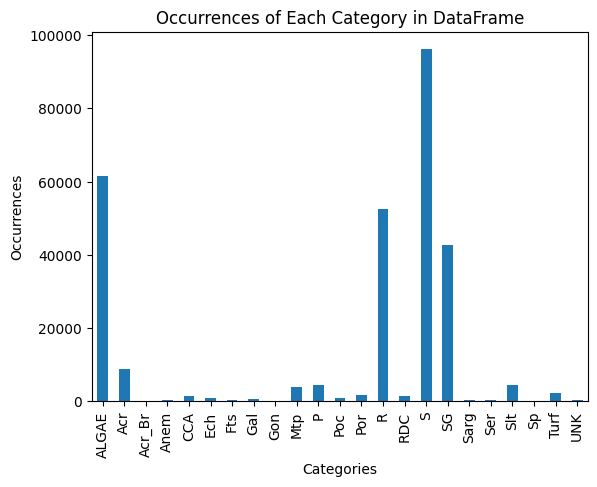

In [28]:
def histo(df):
    # Plot the sum of each column
    count = df[list(df)[1:]].sum()
    count = count[count > NB_MINIMUM_LABEL]

    count.plot(kind='bar')

    # Add labels and title
    plt.xlabel('Categories')
    plt.ylabel('Occurrences')
    plt.title('Occurrences of Each Category in DataFrame')

    # Show the plot
    plt.show()
    return df[["FileName"] + list(count.index)]

df_Toliara = histo(df_Toliara)
df_Salary = histo(df_Salary)
df = histo(df)

In [29]:
df_Toliara.to_csv(CSV_PATH_Toliara, index=False)
df_Salary.to_csv(CSV_PATH_Salary, index=False)
df.to_csv(CSV_PATH_both, index=False)

In [32]:
def split_train_test_val(t_df):
    df_train, df_test, df_val = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for label in list(t_df)[1:]:
        train_val, test = train_test_split(t_df[t_df[label] == 1], test_size=0.2, random_state=42)  # 20% for testing
        train, val = train_test_split(train_val, test_size=0.25, random_state=42)  # 25% of remaining data for validation
        df_train = pd.concat([df_train, train])
        df_test = pd.concat([df_test, test])
        df_val = pd.concat([df_val, val])

    df_train = df_train.fillna(0)
    df_test = df_test.fillna(0)
    df_val = df_val.fillna(0)

    return df_train.sample(frac=1).reset_index(drop=True), df_test.sample(frac=1).reset_index(drop=True), df_val.sample(frac=1).reset_index(drop=True)

def show_metrics(t_df, sub_df):

    for label in list(t_df)[1:]:
        max_v = len(t_df[t_df[label] == 1])
        v = len(sub_df[sub_df[label] == 1])
        ratio = v /max_v

        print(label, ratio, v, max_v)

train, test, val = split_train_test_val(df)

OUTPUT_FOLDER.mkdir(exist_ok=True, parents=True)

train.to_csv(Path(OUTPUT_FOLDER, "train_df.csv"), index=False)
test.to_csv(Path(OUTPUT_FOLDER, "test_df.csv"), index=False)
val.to_csv(Path(OUTPUT_FOLDER, "val_df.csv"), index=False)